<a href="https://colab.research.google.com/github/omshewale20195/Projects-/blob/DeepLearning(CNN)/Copy_of_notebook54961d2fc2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:30<00:00, 34.9MB/s]
100% 1.06G/1.06G [00:30<00:00, 37.5MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [40]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.regularizers import l1, l2, l1_l2


In [7]:
# generater are use for large amounts of data generaters make for a
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
# generater are use for large amounts of data generaters make for a
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
# Normalize Numpy to pandas
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, l1_l2

model = Sequential()

# Convolutional layers
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Fully connected layers with L1/L2 regularization
model.add(Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.1))

# Output layer
model.add(Dense(1, activation='sigmoid', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))


In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 84ms/step - accuracy: 0.5658 - loss: 3.5907 - val_accuracy: 0.6848 - val_loss: 1.4680
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.6827 - loss: 1.3357 - val_accuracy: 0.6408 - val_loss: 1.2216
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.7529 - loss: 0.9620 - val_accuracy: 0.7690 - val_loss: 0.8139
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 87ms/step - accuracy: 0.7950 - loss: 0.8118 - val_accuracy: 0.7266 - val_loss: 0.9514
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 82ms/step - accuracy: 0.8232 - loss: 0.7644 - val_accuracy: 0.8056 - val_loss: 0.7975
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8531 - loss: 0.8390 - val_accuracy: 0.8176 - val_loss: 0.8785
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.8764 - loss: 0.8791 - val_accuracy: 0.8000 - val_loss: 1.1144
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.9036 - loss: 0.9834 - 

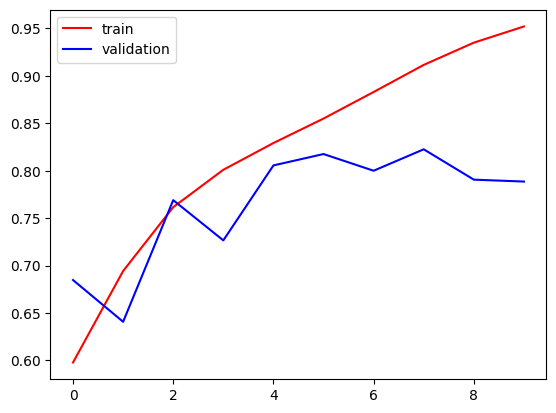

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

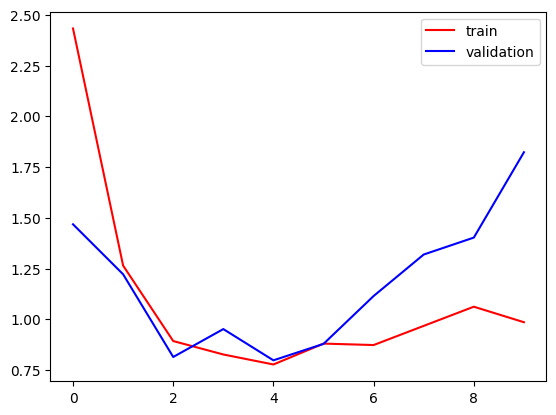

In [45]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [21]:
# way to reduse overfiting
# add more data
# data Argument ->> Next video
# L1/L2 Regularazation
# Dropouts
#Batch norm
#REduce complexity

In [46]:
import cv2

In [61]:
test_img = cv2.imread('/content/dog.jpeg')

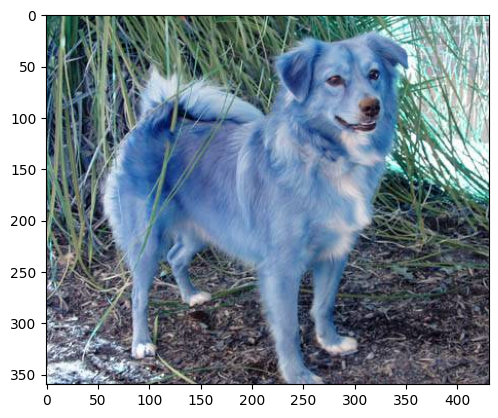

In [62]:
plt.imshow(test_img)

In [63]:
test_img = cv2.resize(test_img,(256,256))

In [64]:
test_input = test_img.reshape((1,256,256,3))

In [65]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[1.]], dtype=float32)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [56]:
test_img = cv2.imread('/content/cat.jpeg')

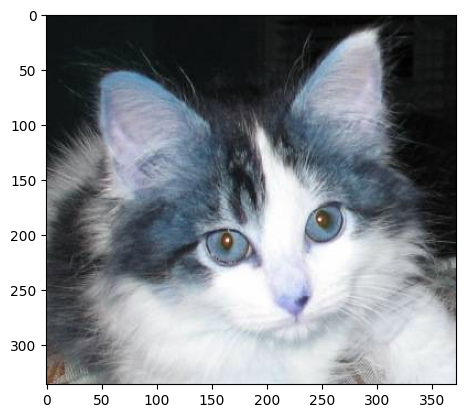

In [57]:
plt.imshow(test_img)

In [58]:
test_img = cv2.resize(test_img,(256,256))

In [59]:
test_input = test_img.reshape((1,256,256,3))

In [60]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[1.]], dtype=float32)